## GRIP AUG 2021 BATCH

### Task : Color Identification in Images
###            Implement an image color detector which identifies all the colors in an image or video.


### Name: PRANAV SUDHIR PATIL¶

### Importing the required libraries :

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from sklearn.cluster import KMeans
%matplotlib inline

### Working with OpenCV: 

The type of this input is <class 'numpy.ndarray'>
Shape: (787, 1050, 3)


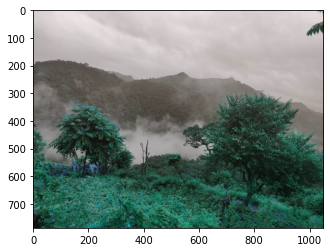

In [11]:
image = cv2.imread('opencv2.jpeg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image);

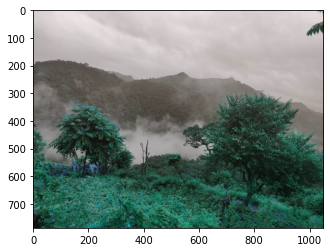

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

### Gray Scaling: 

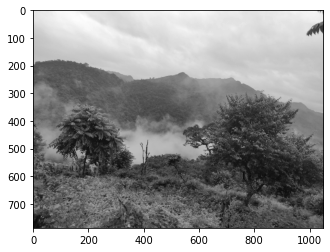

In [15]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray');

### Resizing the image:

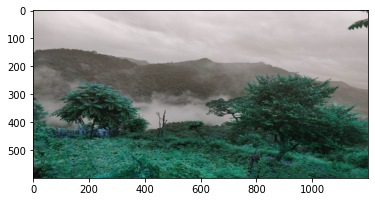

In [17]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image);

### RGB to Hex Conversion:

In [18]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Reading image in RGB color space:

In [19]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

### Getting colors from an image: 

In [22]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
   # We will get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors

[array([119.57470285, 124.11110638, 123.73535551]),
 array([205.82245854, 205.5221233 , 213.00466221]),
 array([28.39141278, 37.17995549, 18.69990791]),
 array([82.8038422 , 89.50117788, 90.65330635]),
 array([106.76041846, 122.37811117,  55.60901305]),
 array([178.65038383, 179.24658972, 185.63845474]),
 array([52.47305135, 64.93623417, 32.38481159]),
 array([75.97212847, 92.44267372, 38.13090226])]

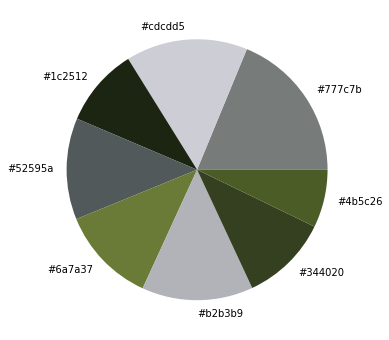

In [23]:
# Calling the function
get_colors(get_image('opencv2.jpeg'),8,True)

In [29]:
IMAGE_DIRECTORY = 'Untitled Folder 1'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

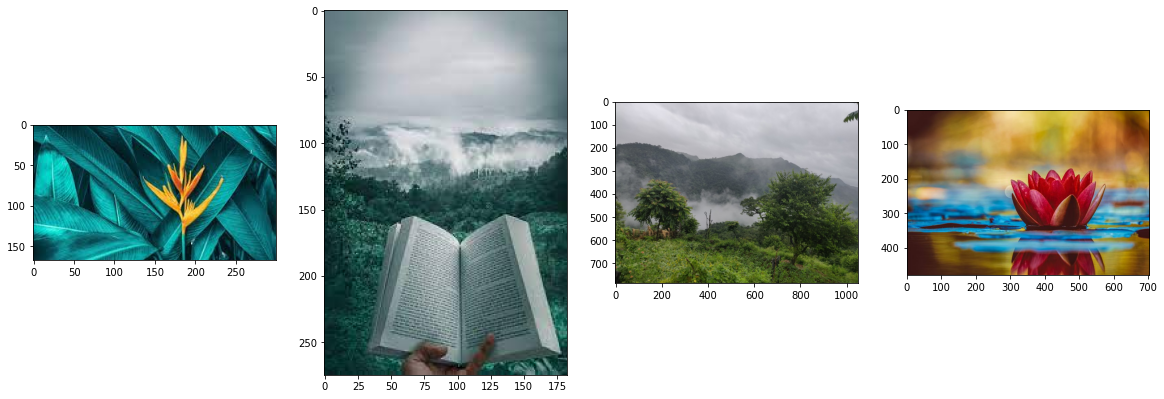

In [30]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [31]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    return select_image

In [32]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    for i in range(len(images)):
        selected = match_image_by_color(images[i],color,threshold,colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Searching for GREEN: 

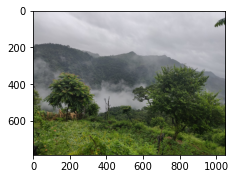

In [33]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

### Searching for BLUE: 

In [35]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5);

<Figure size 1440x720 with 0 Axes>

There is no output as none of the pictures contain blue colour. 

### Searching for YELLOW:

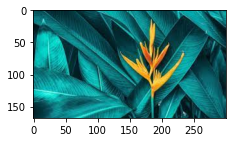

In [36]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

### Thank You ! 